Section -1 : Data Preparation

In [1]:
# importing modules
# I am using Jupyter Lite and it doesnt support seaborn module. So, for box plots and all, i will be using matplotlib only
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import warnings                                                                
warnings.filterwarnings('ignore') 

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 1. Loading data into dataframe

db=pd.read_csv('diabetes.csv')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#List of Column Names
list(db.columns)
###List of all columns :['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
### 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [4]:
# 2. Check for missing values 
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
db.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking for zero values
(db[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

# There is no missing values but zero values are present. Zero Values need to be filled with mean or median or other relevant value. Treating Zero values is important otherwise it will impact the analysis. For example, zero BMI means the person doesnt have BMI which is incorrect.

In [7]:
# Replacing zero values in critical columns with NaN
col=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
db[col]=db[col].replace(0,np.nan)

In [8]:
#calculate the total missing values per column.
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [9]:
#4. Use appropriate methods to fill missing values (e.g., median or mean). 
# For Glucose and Insulin, it looks like there are outliers. Therefore, to fill missing values, it is better to use median
# is it not sensitive to outliers.
# for consistency, i am replacing missing values for all 5 columns with median

db['Glucose'].fillna(db['Glucose'].median(), inplace=True)
db['BloodPressure'].fillna(db['BloodPressure'].median(), inplace=True)
db['BMI'].fillna(db['BMI'].median(), inplace=True)
db['SkinThickness'].fillna(db['BloodPressure'].median(), inplace=True)
db['Insulin'].fillna(db['BMI'].median(), inplace=True)

In [10]:
db['Glucose'].isna().sum()
db['BloodPressure'].isna().sum()
db['BMI'].isna().sum()
db['SkinThickness'].isna().sum()
db['Insulin'].isna().sum()

np.int64(0)

In [11]:
# 5. Chcking the datatypes. 
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [12]:
# 5. Initially the following values were int and after filling zero, it got converted to float. So, changing it back to int.
#    For age column, it can be converted to bands.
db["Insulin"]=db["Insulin"].astype('int64')
db["SkinThickness"]=db["SkinThickness"].astype('int64')
db["Glucose"]=db["Glucose"].astype('int64')
db["BloodPressure"]=db["BloodPressure"].astype('int64')

In [13]:
#    For age column, it can be converted to bands.

db["Age_band"]=0
db.loc[db["Age"]<30,'Age_band']="Age_<30"
db.loc[(db["Age"]>=30)&(db["Age"]<=40),'Age_band']="Age_30-40"
db.loc[(db["Age"]>40)&(db["Age"]<=50),'Age_band']="Age_40-50"
db.loc[db["Age"]>50,'Age_band']="Old_Age"

In [14]:
# 6. Summarizing data
db.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_band
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Age_<30
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396
mean,3.845052,121.656250,72.386719,41.817708,95.382812,32.455208,0.471876,33.240885,0.348958,NaN
std,3.369578,30.438286,12.096642,21.447990,105.104775,6.875177,0.331329,11.760232,0.476951,NaN
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,NaN
25%,1.000000,99.750000,64.000000,25.000000,32.000000,27.500000,0.243750,24.000000,0.000000,NaN
50%,3.000000,117.000000,72.000000,35.000000,32.000000,32.300000,0.372500,29.000000,0.000000,NaN
75%,6.000000,140.250000,80.000000,72.000000,127.250000,36.600000,0.626250,41.000000,1.000000,NaN


# 8. Target variable is Outcome and for feature variables, we need to understand the distribution and correlation

In [15]:
# 9. We will split data into 25% test and 75% training data. We cannot use all of the data as it will lead overfitting. 
#    And, if we use less data the it will lead to underfitting.

In [16]:
# 10. Display first 5 rows of data

db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_band
0,6,148,72,35,32,33.6,0.627,50,1,Age_40-50
1,1,85,66,29,32,26.6,0.351,31,0,Age_30-40
2,8,183,64,72,32,23.3,0.672,32,1,Age_30-40
3,1,89,66,23,94,28.1,0.167,21,0,Age_<30
4,0,137,40,35,168,43.1,2.288,33,1,Age_30-40


Section 2: Exploratory Data Analysis

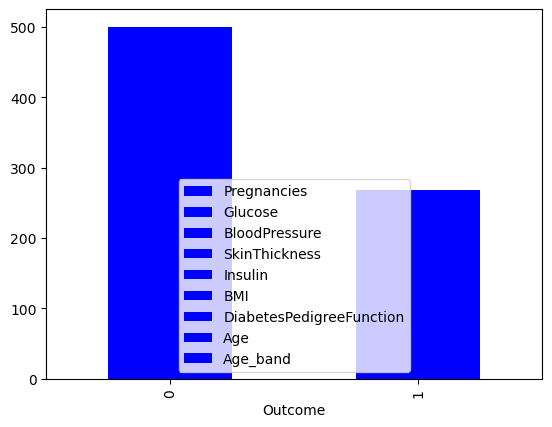

In [17]:
#1. Plot the distribution of the 'Outcome' variable.

db.groupby(["Outcome"]).count().plot(kind='bar',color='blue')
plt.show()

<Axes: >

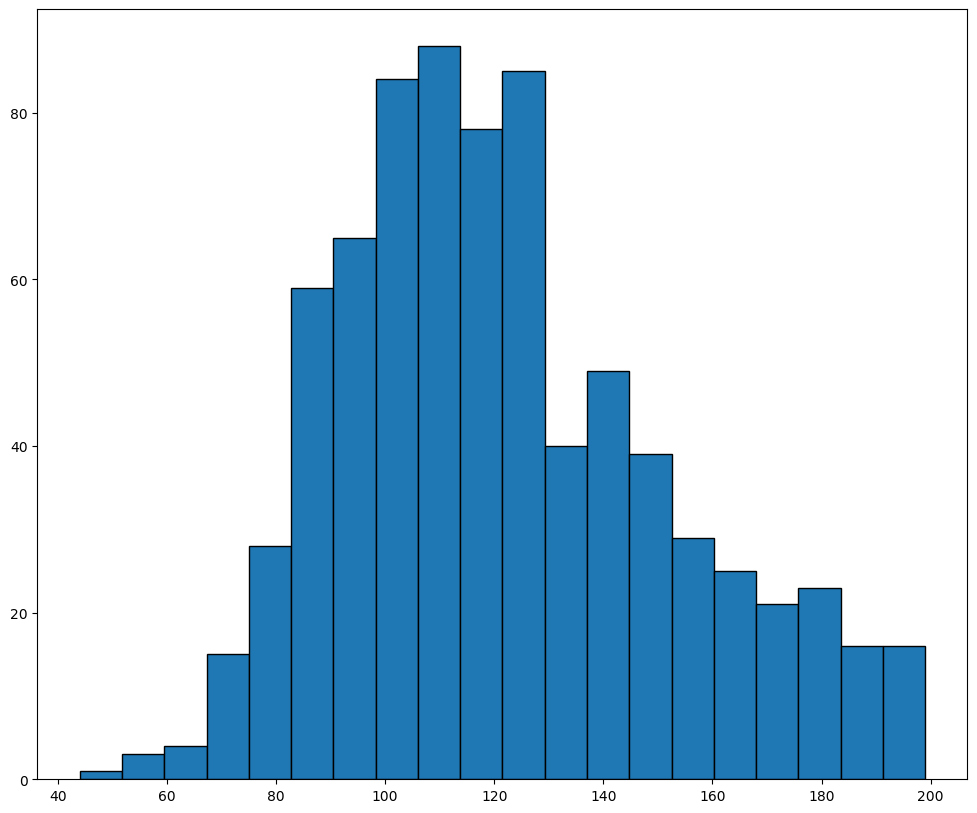

In [18]:
#2. Create histograms for all numerical features

db['Glucose'].hist(figsize=(12, 10), bins=20, grid=False, edgecolor='black')

Insights:
    There are significant people with high level of Glucose

<Axes: >

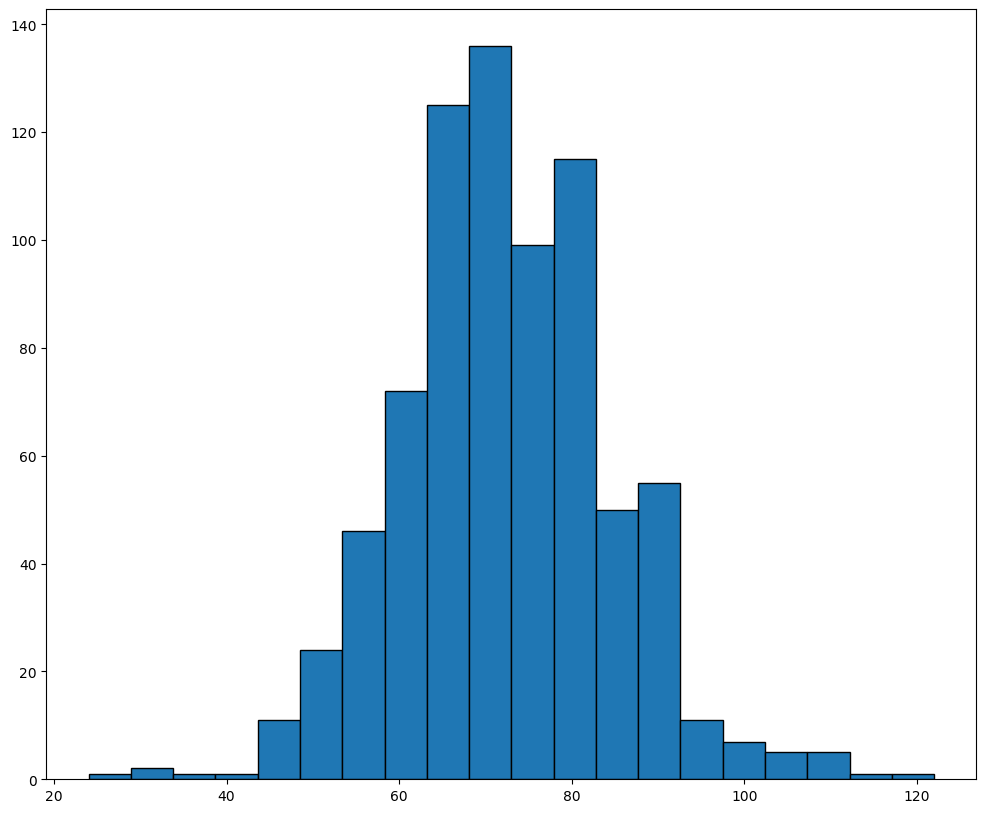

In [19]:
db['BloodPressure'].hist(figsize=(12, 10), bins=20, grid=False, edgecolor='black')

<Axes: >

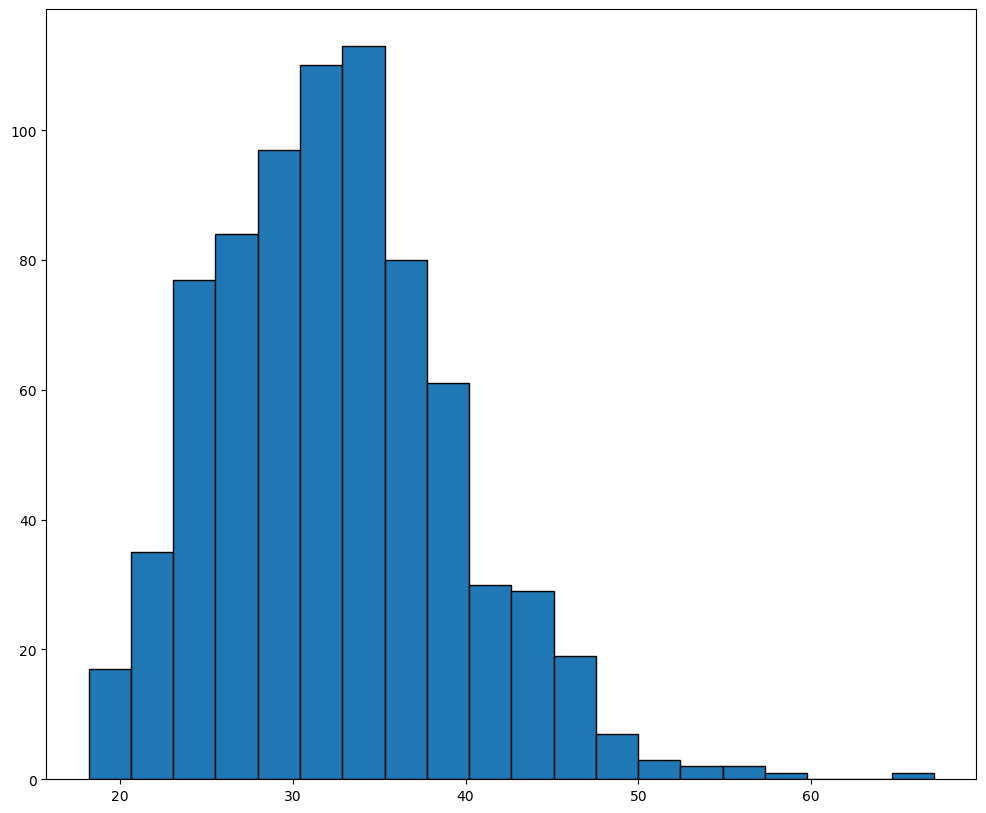

In [20]:
db['BMI'].hist(figsize=(12, 10), bins=20, grid=False, edgecolor='black')

<Axes: >

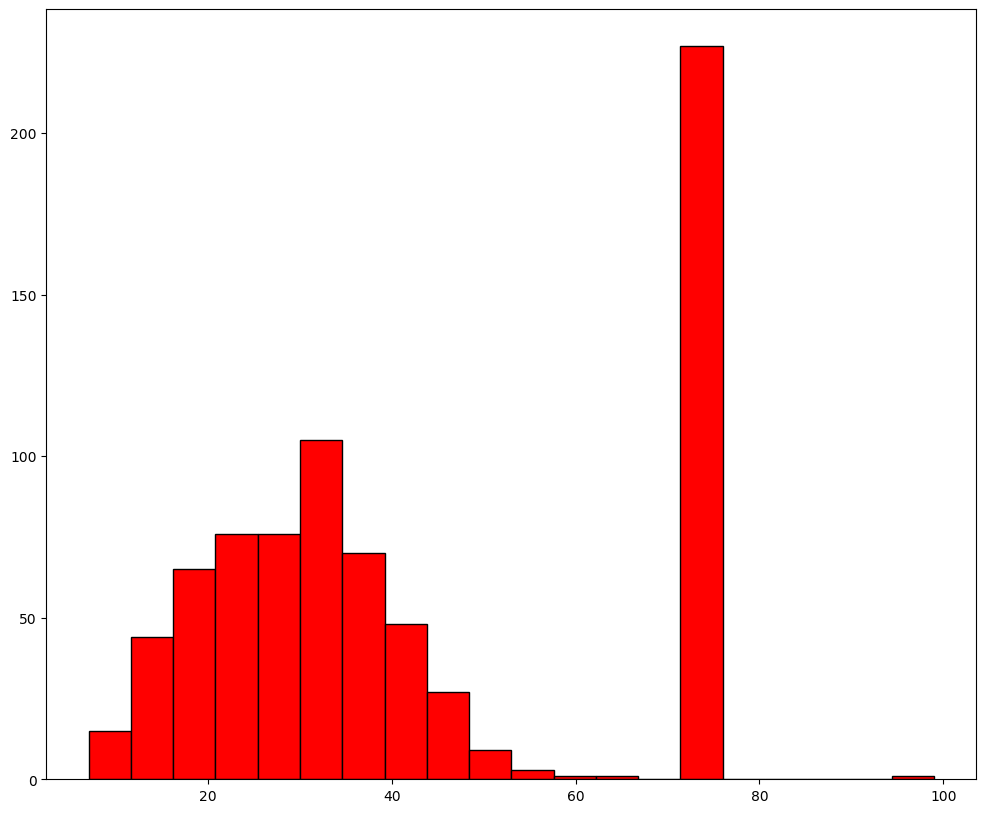

In [21]:
db['SkinThickness'].hist(figsize=(12, 10), bins=20, grid=False, edgecolor='black', color='red')

Histogram of Skin Thickness Insight: There is 2 outliers - one having significant number which need to be corrected.
This can be seen with box plot as well.

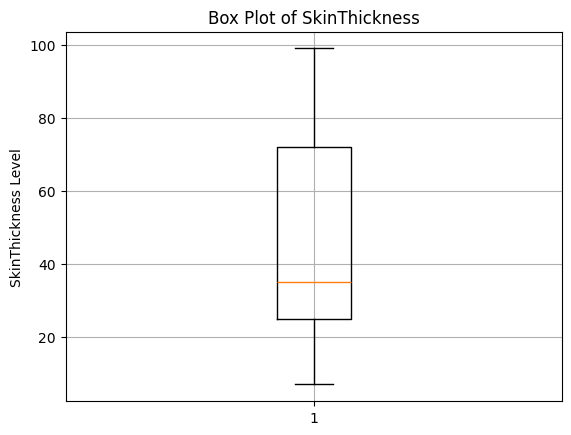

In [22]:
# 3. Box plot of SkinThickness column to analysis outlier
plt.boxplot(db['SkinThickness'])
plt.title('Box Plot of SkinThickness')
plt.ylabel('SkinThickness Level')
plt.grid(True)
plt.show()

In [23]:
# Skin thickness has outlier having significant number of people. Replacing its values to median

median_value = db['SkinThickness'].median()
db.loc[(db['SkinThickness'] > 60), 'SkinThickness'] = median_value


<Axes: >

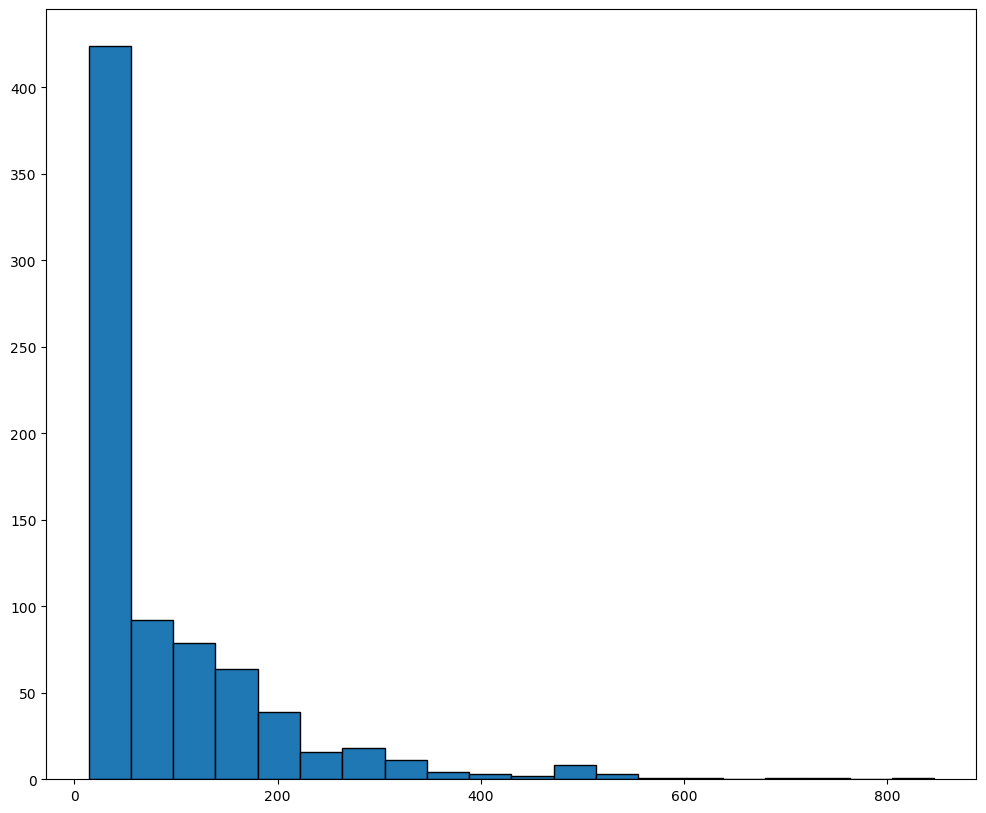

In [24]:
db['Insulin'].hist(figsize=(12, 10), bins=20, grid=False, edgecolor='black')

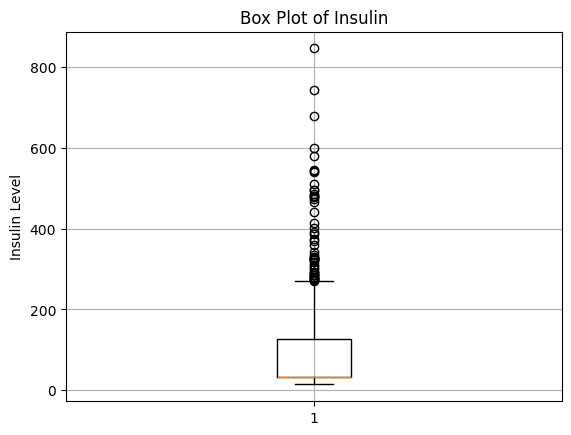

In [25]:
# 3. Box plot of Insulin column to analysis outlier
plt.boxplot(db['Insulin'])
plt.title('Box Plot of Insulin')
plt.ylabel('Insulin Level')
plt.grid(True)
plt.show()

In [26]:
# We can see outliers in Insulin, treating outliers by capping method

db['Insulin']=db['Insulin'].clip(upper=250)

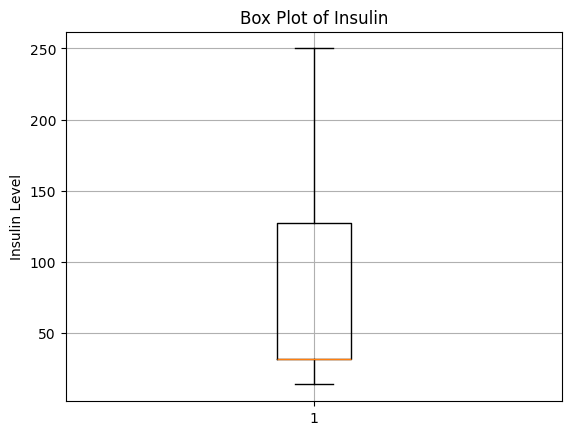

In [27]:
# rechecking through box plot
# Box plot of Insulin column to analysis outlier
plt.boxplot(db['Insulin'])
plt.title('Box Plot of Insulin')
plt.ylabel('Insulin Level')
plt.grid(True)
plt.show()

#4. Plot a heatmap to observe correlations among variables.

In [28]:
#compute correlation matrix
corr =db.corr(numeric_only=True)
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.139505,-0.061325,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.173333,0.333671,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.228921,-0.032591,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.139505,0.173333,0.228921,1.000000,-0.012699,0.493919,0.026952,0.174960,0.212977
Insulin,-0.061325,0.333671,-0.032591,-0.012699,1.000000,0.206563,0.187612,-0.043467,0.148291
BMI,0.021559,0.231049,0.281257,0.493919,0.206563,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.026952,0.187612,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.174960,-0.043467,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.212977,0.148291,0.312038,0.173844,0.238356,1.000000


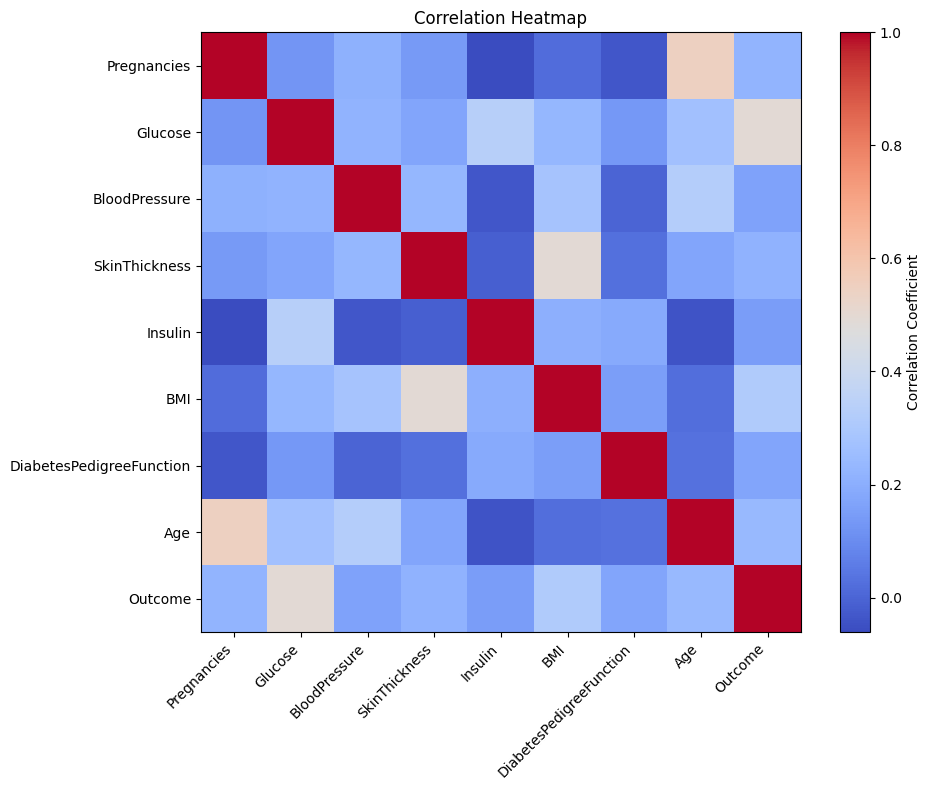

In [29]:
#4. Plot a heatmap to observe correlations among variables
# Create heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [30]:
#6. Compare average BMI and Glucose values across 'Outcome' classes.
db.groupby('Outcome')[['BMI','Glucose']].mean()

,BMI,Glucose
Outcome,,
0,30.885600,110.682000
1,35.383582,142.130597


In [31]:
#7. Check if older individuals have higher diabetes rates using groupby.
db.groupby('Age_band')['Outcome'].sum()

Age_band
Age_30-40    82
Age_40-50    64
Age_<30      84
Old_Age      38
Name: Outcome, dtype: int64

Section 3: Model Training and Testing

In [32]:
db.drop('Age_band',axis=1, inplace=True)


In [33]:
# split data into training dataset and test dataset
import sklearn
from sklearn.model_selection import train_test_split
X = db.drop('Outcome', axis=1)  # features
y = db['Outcome']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,        # 20% for testing
    random_state=0,      # reproducible results
    stratify=y            # keeps outcome class balance
)

In [34]:
X_test.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,2,106,64,35,119,30.5,1.400,34
565,2,95,54,14,88,26.1,0.748,22
390,1,100,66,29,196,32.0,0.444,42
736,0,126,86,27,120,27.4,0.515,21
587,6,103,66,35,32,24.3,0.249,29


In [35]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


LogisticRegression()

In [36]:
#2. Evaluate the model on the test set using accuracy score.
y_pred=logreg.predict(X_test)

In [37]:
logreg.intercept_

array([-7.88338442])

In [38]:
#3. Generate and interpret the confusion matrix.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

#TP = 13 , #TN = 8, #FP = 0, #FN= 2

array([[107,  18],
       [ 28,  39]], dtype=int64)

In [39]:
#4. Print the classification report. What are the precision and recall values?
from sklearn.metrics import classification_report

# Predict labels on the test set
y_pred = logreg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.68      0.58      0.63        67

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.75      0.76      0.76       192



In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

## TP/TP+FP


print("Recall:",metrics.recall_score(y_test, y_pred))
## TP/TP+FN 


Accuracy: 0.7604166666666666
Precision: 0.6842105263157895
Recall: 0.582089552238806


Insights: The model predicts the condition of the diabetes 76% of the times. The accuracy of the model can be improved.

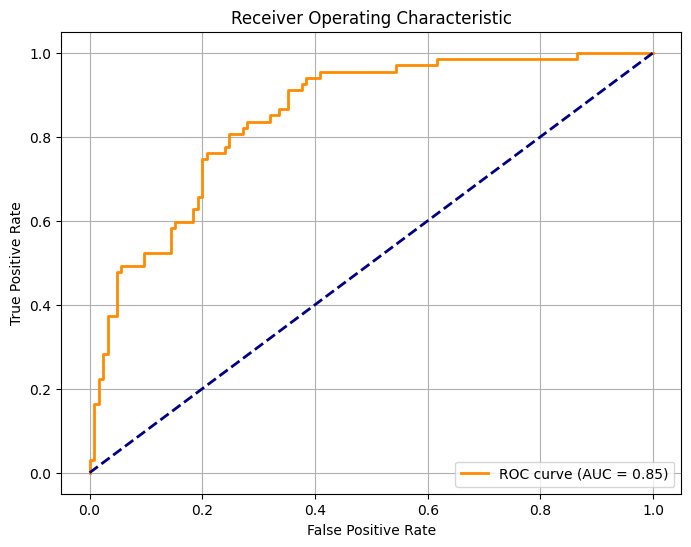

In [41]:
#5. Plot the ROC curve and calculate the AUC score.

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (assuming you're using a classifier like logistic regression)
y_probs = logreg.predict_proba(X_test)[:, 1]  # probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [42]:
# 6.training a Decision Tree classifier 
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the model
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

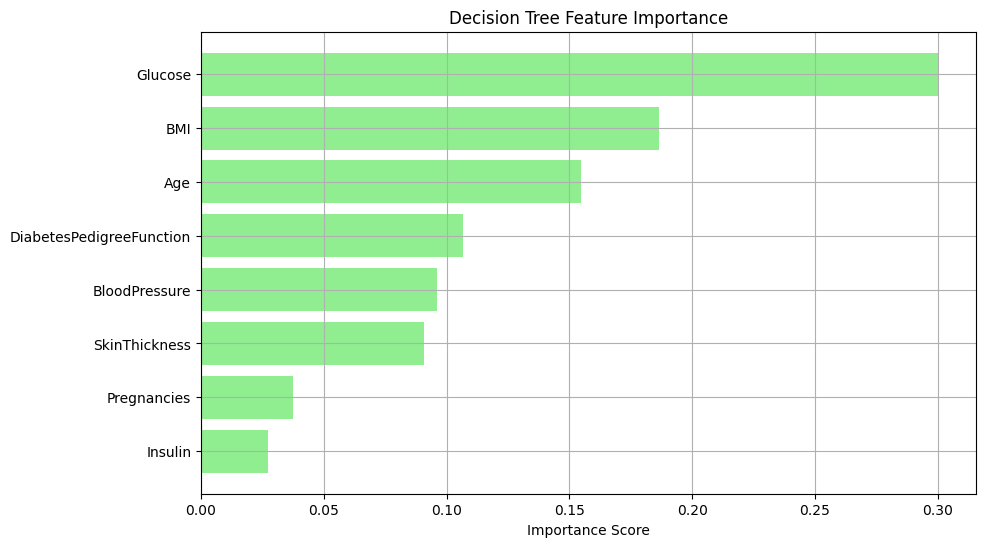

In [43]:
# Get importance scores
importances = tree_model.feature_importances_
features = X_train.columns

# Create and sort DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

7. Which features appear to be most important in predicting diabetes?
   THe top 3 features:
   a. Glucose
   b. BMI
   c. Age